In [1]:
import numpy as np
import pandas as pd

In [2]:
class LogisticRegressor():
    def __init__(self, lr = 0.0001, epochs = 100 , threshold = 0.5):
        self.__lr = lr
        self.__epochs = epochs
        self.__threshold = threshold
        self.__losses = []
        self.__W = None

    def _computeLoss(self,y,y_hat):
        return -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)

    def _sigmoidFunc(self,z):
            return 1 / (1 + np.exp(-z))

    def _predict(self,X):
        z = np.dot(X,self.__W)
        return self._sigmoidFunc(z)

    def predict(self,X):
        X = np.hstack([np.ones((X.shape[0],1)),X])
        y_hat = self._predict(X)
        return np.where(y_hat < self.__threshold, 0, 1)

    def _computeGradient(self,X,y,y_hat):
        return np.dot(X.T,y_hat-y)

    def _updateWeight(self,gradient):
        return self.__W - self.__lr * gradient

    def fit(self,X,y):
        X = np.hstack([np.ones((X.shape[0],1)),X])
        self.__W = np.array([0] * X.shape[1])
        for epoch in range(self.__epochs):
            y_hat = self._predict(X)
            loss = self._computeLoss(y,y_hat)
            gradient = self._computeGradient(X,y,y_hat)
            self.__W = self._updateWeight(gradient)
            self.__losses.append(np.mean(loss))

    def parameters(self):
        return self.__W

    def losses(self):
        return self.__losses

# 1. Load dataset

In [3]:
df = pd.read_csv('data.csv')
df

,Width,Length,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


# 2. Import libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 3. Train test split

In [5]:
X = df.iloc[:,:2].values
y = df.iloc[:,-1].values

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# 4. Logistic regression model

Text(0, 0.5, 'Accuracy')

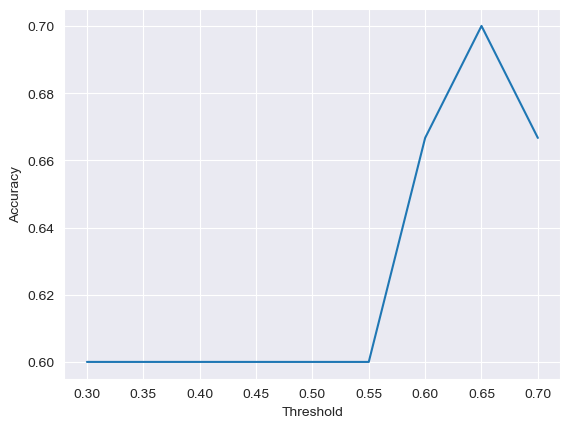

In [7]:
thresholds = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
learning_rate = 0.00001
epochs = 100
accs = []
for threshold in thresholds:
    log_reg = LogisticRegressor(lr=learning_rate,epochs=epochs,threshold=threshold)
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_val)
    acc = accuracy_score(y_val,y_pred)
    accs.append(acc)
plt.plot(thresholds,accs)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')